In [1]:
# Hint: If lines are created with support of a Large Language Model or the code is taken from another source, you find following hint at the end of the line:
#       (generated with Microsoft Copilot) or (source: link_to_source)

In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [3]:
df = pd.read_json('../data/df_repos_counts.json')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   repo_owner                    201 non-null    object
 1   repo_name                     201 non-null    object
 2   source_code_comments          201 non-null    int64 
 3   source_code                   201 non-null    int64 
 4   source_code_cleaned_comments  201 non-null    int64 
 5   source_code_cleaned           201 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.6+ KB


In [5]:
df.head(5)

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned
0,facebook,chisel,207143,173666,143319,118140
1,microsoft,Swin-Transformer,274996,227911,203038,165620
2,openai,point-e,191920,149995,135633,104964
3,THUDM,ChatGLM3,194864,163924,138044,112246
4,PacktPublishing,Deep-Reinforcement-Learning-Hands-On,492396,417662,360670,305380


In [6]:
df['comments'] = df['source_code_comments'] - df['source_code']
df['formatting'] = df['source_code'] - df['source_code_cleaned']  # characters which werde removed to get clean code with comments
df['sum'] = df['comments'] + df['formatting'] + df['source_code_cleaned']

df.head(10)

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum
0,facebook,chisel,207143,173666,143319,118140,33477,55526,207143
1,microsoft,Swin-Transformer,274996,227911,203038,165620,47085,62291,274996
2,openai,point-e,191920,149995,135633,104964,41925,45031,191920
3,THUDM,ChatGLM3,194864,163924,138044,112246,30940,51678,194864
4,PacktPublishing,Deep-Reinforcement-Learning-Hands-On,492396,417662,360670,305380,74734,112282,492396
5,tornadoweb,tornado,1673269,376000,1179006,268496,1297269,107504,1673269
6,tatsu-lab,stanford_alpaca,29258,22603,21987,17117,6655,5486,29258
7,browser-use,browser-use,1020722,203278,885970,171216,817444,32062,1020722
8,dennybritz,cnn-text-classification-tf,19056,16407,14555,12389,2649,4018,19056
9,amoffat,sh,223919,46320,153131,33485,177599,12835,223919


In [7]:
df.describe()

,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum
count,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,201.000000,2.010000e+02
mean,8.490456e+05,5.097566e+05,6.093967e+05,3.602737e+05,3.392890e+05,149482.915423,8.490456e+05
std,1.193813e+06,7.207696e+05,8.667607e+05,5.193428e+05,6.574964e+05,206587.209277,1.193813e+06
min,2.055000e+03,1.388000e+03,1.477000e+03,9.520000e+02,3.000000e+02,262.000000,2.055000e+03
25%,1.106280e+05,7.250000e+04,7.815000e+04,5.551000e+04,2.031300e+04,23097.000000,1.106280e+05
50%,3.275810e+05,2.279110e+05,2.345280e+05,1.656200e+05,7.629700e+04,65319.000000,3.275810e+05
75%,1.097266e+06,5.453770e+05,7.683470e+05,3.774890e+05,3.829660e+05,166268.000000,1.097266e+06
max,7.744265e+06,4.580332e+06,5.807014e+06,3.588245e+06,6.343838e+06,994599.000000,7.744265e+06


In [8]:
df[df['repo_name'] == '']

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum


In [9]:
df[df['repo_owner'] == '']

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum


In [10]:
df.sort_values('source_code_comments').head(20)

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum
31,openstack,openstack,2055,1388,1477,952,667,436,2055
148,Taniiishk,Rock-Paper-Scissors-Game,2435,2135,2133,1873,300,262,2435
129,majumderb,rezero,7519,4416,5645,3299,3103,1117,7519
80,diego-vicente,som-tsp,7670,5865,5778,4293,1805,1572,7670
102,andkret,Cookbook,9729,4550,7942,3537,5179,1013,9729
38,JakeWharton,pidcat,12800,10931,10570,9080,1869,1851,12800
109,lennylxx,ipv6-hosts,13680,12735,8966,8254,945,4481,13680
132,sebastianruder,NLP-progress,13681,10453,9427,6938,3228,3515,13681
34,awslabs,aws-config-to-elasticsearch,13701,12328,9183,8127,1373,4201,13701
188,realpython,cookiecutter-flask-skeleton,17173,15567,13238,11792,1606,3775,17173


In [11]:
df_2 = df[['repo_name', 'source_code_cleaned', 'comments', 'formatting']]

In [12]:
df_2.sort_values('comments',ascending=False)

,repo_name,source_code_cleaned,comments,formatting
69,pipenv,939302,6343838,461125
118,habitat-lab,277872,2974225,93336
13,altair,1883144,2067216,727917
110,SeleniumBase,1063654,2035104,542029
166,tf-quant-finance,1638227,2000046,570876
...,...,...,...,...
34,aws-config-to-elasticsearch,8127,1373,4201
184,Learning-to-See-in-the-Dark,25056,1328,6479
109,ipv6-hosts,8254,945,4481
31,openstack,952,667,436


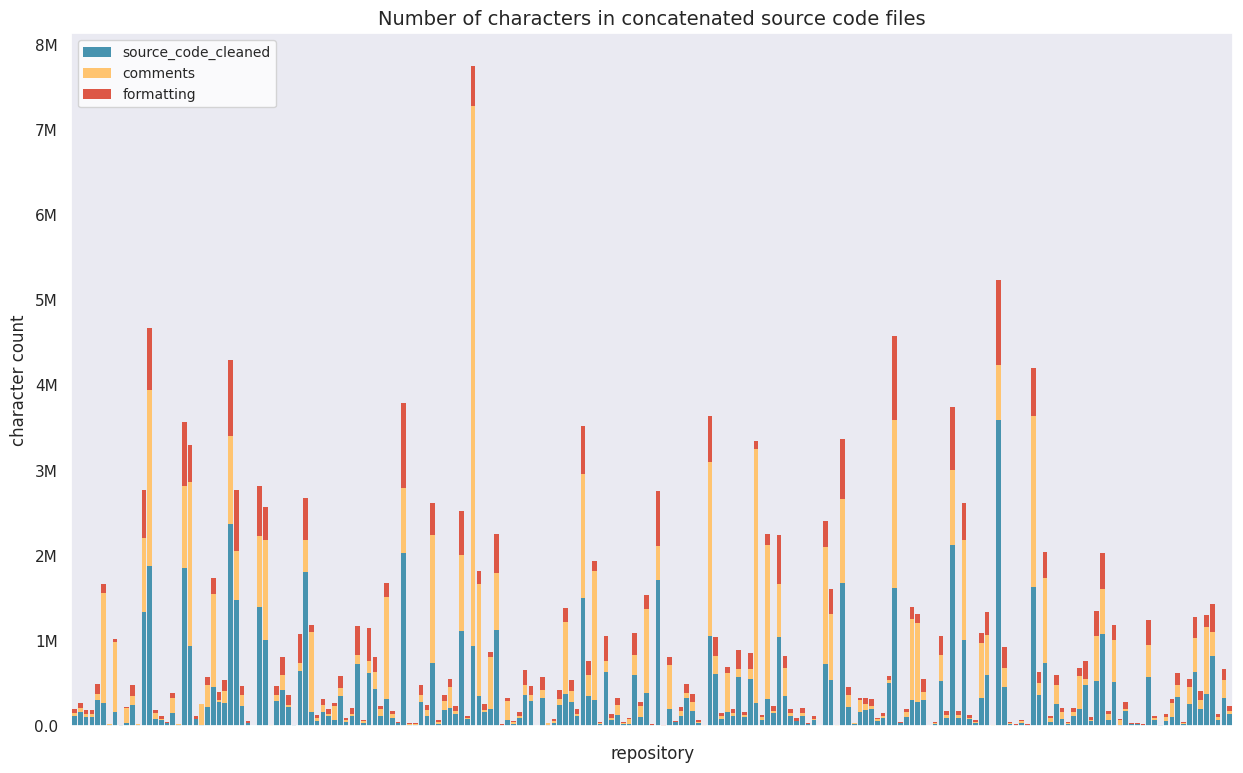

In [13]:
colors = ['#4793AF', '#FFC470', '#DD5746']

def format_yaxis(value, _): # (generated with Microsoft Copilot)
    if value >= 1_000_000:
        return f'{int(value / 1_000_000)}M'  # f'{value / 1_000_000:.1f}M' --> if i want a decimal number
    elif value >= 1_000:
        return f'{int(value / 1_000)}k'  # f'{value / 1_000:.1f}k' --> if i want a decimal number
    return str(value)


with sns.axes_style('white'):
    sns.set_theme(style='dark')
    fig, ax = plt.subplots(figsize=(15, 9))
    df_2.set_index('repo_name').plot(kind='bar', stacked=True, ax=ax, width=0.8, edgecolor='none', color=colors) #edgecolor='none'

    ax.set_title('Number of characters in concatenated source code files', fontdict={'fontsize': 14})
    ax.set_xlabel('repository')
    ax.set_ylabel('character count')
    ax.yaxis.set_major_formatter(FuncFormatter(format_yaxis))
    ax.set_xticklabels([])
    plt.legend(loc=2, fontsize=10, facecolor='white')
    plt.grid(visible=False)
    plt.show()

    sns.reset_defaults()



## Filter repositories and remove duplicates

In [14]:
repos_exclude = [('ccxt', 'ccxt'), ('bbfamily', 'abu'), ('lonePatient', 'awesome-pretrained-chinese-nlp-models'), ('Lcry', 'a-sheep-assistant'),('eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee', 'eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee')] 

In [15]:
df_filtered = df[~df.set_index(['repo_owner', 'repo_name']).index.isin(repos_exclude)]

In [16]:
len(df_filtered)

201

In [17]:
counts = df_filtered.groupby(['repo_owner', 'repo_name']).size().reset_index(name='count')

In [18]:
duplicates = counts[counts['count'] > 1]

In [19]:
duplicates

,repo_owner,repo_name,count


In [20]:
# tmp_df = pd.DataFrame(columns=['idx', 'repo_owner', 'repo_name'])

# for index, row in duplicates.iterrows():
#     new_entry = {
#         'idx': df_filtered[df_filtered['repo_owner'] == row['repo_owner']].index[0],
#         'repo_owner': row['repo_owner'],
#         'repo_name': row['repo_name']
#     }
#     tmp_df = pd.concat([tmp_df, pd.DataFrame([new_entry])], ignore_index=True)

In [21]:
#idx_exclude = tmp_df['idx'].to_list()

In [22]:
#df_filtered = df_filtered[~df_filtered.index.isin(idx_exclude)]

In [23]:
#len(df_filtered)

## Order repository counts ascending

In [24]:
df_to_save = df_filtered.sort_values('source_code_cleaned_comments',ascending=True)


In [25]:
#df_to_save.to_json('../data/df_repos_counts_filtered.json', orient='records')

## token count

In [26]:
df_filtered.head(5)

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum
0,facebook,chisel,207143,173666,143319,118140,33477,55526,207143
1,microsoft,Swin-Transformer,274996,227911,203038,165620,47085,62291,274996
2,openai,point-e,191920,149995,135633,104964,41925,45031,191920
3,THUDM,ChatGLM3,194864,163924,138044,112246,30940,51678,194864
4,PacktPublishing,Deep-Reinforcement-Learning-Hands-On,492396,417662,360670,305380,74734,112282,492396


In [27]:
# estimation for addtional tokens of sno
df_filtered['tokens_source_code_cleaned_comments'] = df_filtered['source_code_cleaned_comments'].apply(lambda x: (x / 3.99) + 11000).round().astype(int)

In [28]:
df_filtered[df_filtered['repo_name'] == 'click']

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum,tokens_source_code_cleaned_comments
170,pallets,click,605682,380523,434453,264691,225159,115832,605682,119885


In [29]:
df_filtered.sort_values('tokens_source_code_cleaned_comments',ascending=False).head(80)

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum,tokens_source_code_cleaned_comments
69,pypa,pipenv,7744265,1400427,5807014,939302,6343838,461125,7744265,1466392
160,psf,black,5236225,4580332,4054420,3588245,655893,992087,5236225,1027145
13,vega,altair,4678277,2611061,3381562,1883144,2067216,727917,4678277,858509
166,google,tf-quant-finance,4209149,2209103,3162748,1638227,2000046,570876,4209149,803669
142,caronc,apprise,4579495,2610364,3142503,1624674,1969131,985690,4579495,798595
...,...,...,...,...,...,...,...,...,...,...
193,pre-commit,pre-commit,550759,345442,416366,259322,205317,86120,550759,115352
23,pytransitions,transitions,572316,313335,413310,222839,258981,90496,572316,114586
81,ranaroussi,yfinance,579147,489902,400766,331735,89245,158167,579147,111443
65,stanford-oval,storm,559218,307453,393150,212036,251765,95417,559218,109534


In [42]:
with open('../data/helper/repos_processed.json') as f:
    loaded_data = json.load(f)

In [43]:
len(loaded_data)

128